# Práctica Independiente: KNN

### A partir del dataset `Breast Cancer Wisconsin` construir un clasficador basado en KNN

En esta práctica vamos a construir un clasificador para predecir el diagnóstico.

Este dataset proviene de observaciones sobre las células de distintos pacientes. 
La información que contiene es la siguiente:

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)) 

Ten real-valued features are computed for each of the three cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)








#### Ejercicio 1. Importar las librerias necesarias

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

#### Ejercicio 2. Leemos el dataset desde una url

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

#### Borramos los campos correspondientes a células repetidas

In [3]:
df = df.drop(list(range(12,32)), axis=1)

#### Asignamos el header a los campos correspondientes

In [4]:
df.columns=['ID_number', 'diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 
 'concavity', 'concave_points', 'symmetry', 'fractal_dimension' ]

In [5]:
df.head()

,ID_number,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
df.shape

(569, 12)

#### Ejercicio 3: Hacer el split entre features y variable target

In [16]:
X = df[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 
 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']]
X = preprocessing.scale(X, axis = 0)
y = df['diagnosis']

#### Ejercicio 4. Hacer el split entre test y training

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Ejericio 5: Establecer en 3 el parametro K

In [27]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Ejercicio 6:  Evaluar la perfomance del modelo en términos de score

In [29]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.97202797202797198

#### Ejercicio 7: Hacer la prediccion sobre el conjunto de testing

In [ ]:
# ??

#### Ejercicio 8: Emplear una matriz de confusion para observar los aciertos vs errores en la clasifiacion

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[93,  2],
       [ 2, 46]])

#### BONUS Ejercicio 9: encontrar cuál es el mejor K

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores_para_df = []

# range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 40 en saltos de a 5. (Start,Stop,Step)
for i in range(1,100,5):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [24]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.sample(5)
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

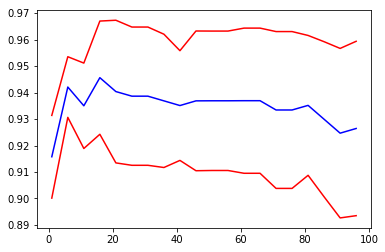

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');